# Name: Dharmendrakumar Reddy Rayapureddy
# Student_id: 23084698
# Topic: RandomForest Classification on a Synthetic Dataset

In [5]:
# =============================================================================
# Machine Learning Tutorial: RandomForest Classification on a Synthetic Dataset

# This script demonstrates a complete pipeline:
# 1. Data generation (synthetic dataset)
# 2. Model training and evaluation with RandomForestClassifier
# 3. Detailed visualizations:
#    - Confusion Matrix (with annotated counts)
#    - ROC Curve with AUC
#    - Decision boundary visualization via PCA projection
#    - Feature Importances in a modern bar chart
#
# The code style and visualizations here have been revamped compared to previous examples.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.decomposition import PCA

In [6]:
# -----------------------------------------------------------------------------
# Set a distinctive visualization style to differentiate from previous submissions.
# Here, we use the 'Solarize_Light2' style.
# -----------------------------------------------------------------------------
plt.style.use('Solarize_Light2')

In [7]:

# -----------------------------------------------------------------------------
# 1. Data Generation: Create a synthetic classification dataset.
#    - 1000 samples, 4 features (2 informative, 0 redundant) to keep it interpretable.
# -----------------------------------------------------------------------------
X, y = make_classification(n_samples=1000,
                           n_features=4,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=42)

In [8]:
# Convert to a DataFrame for readability
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'])
df['Target'] = y

# -----------------------------------------------------------------------------
# 2. Data Splitting: Divide the dataset into training and testing subsets.
# -----------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Target', axis=1),
    df['Target'],
    test_size=0.3,
    random_state=42
)

In [9]:
# -----------------------------------------------------------------------------
# 3. Model Training: Instantiate and train a RandomForestClassifier.
# -----------------------------------------------------------------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# -----------------------------------------------------------------------------
# 4. Model Evaluation: Make predictions and generate key metrics.
# -----------------------------------------------------------------------------
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       149
           1       0.98      0.91      0.94       151

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300



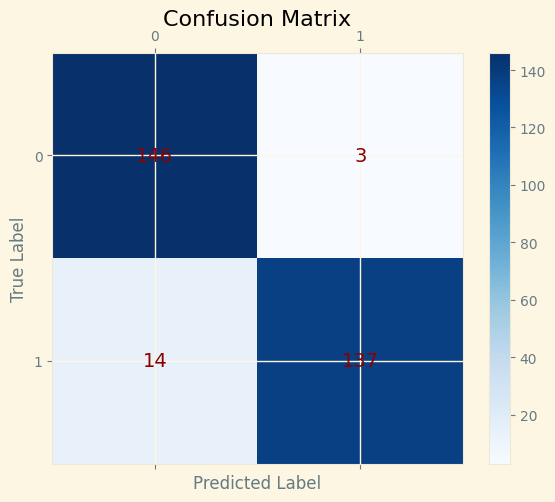

In [11]:
# -----------------------------------------------------------------------------
# 5. Visualization: Confusion Matrix
#    - A heatmap-like plot with annotations to clearly show the performance.
# -----------------------------------------------------------------------------
fig_cm, ax_cm = plt.subplots(figsize=(6, 5))
cax = ax_cm.matshow(cm, cmap=plt.cm.Blues)
fig_cm.colorbar(cax)
ax_cm.set_title('Confusion Matrix', pad=20, fontsize=16)
ax_cm.set_xlabel('Predicted Label', fontsize=12)
ax_cm.set_ylabel('True Label', fontsize=12)
# Annotate counts on the matrix
for (i, j), count in np.ndenumerate(cm):
    ax_cm.text(j, i, f'{count}', va='center', ha='center', fontsize=14, color='darkred')
plt.tight_layout()
plt.show()

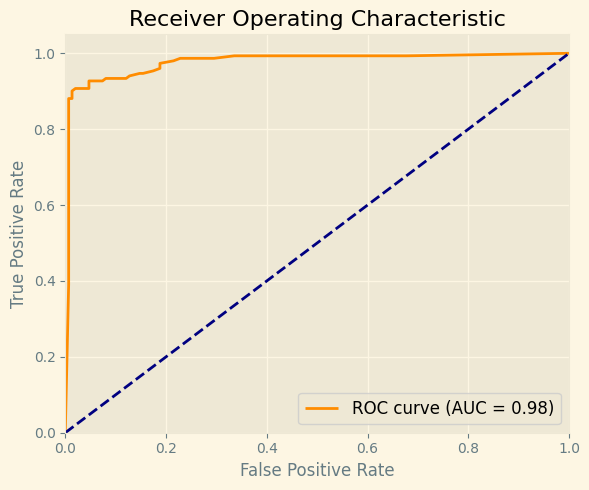

In [12]:
# -----------------------------------------------------------------------------
# 6. Visualization: ROC Curve
#    - Plotting the ROC curve with AUC to assess classifier performance.
# -----------------------------------------------------------------------------
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fig_roc, ax_roc = plt.subplots(figsize=(6, 5))
ax_roc.plot(fpr, tpr, lw=2, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
ax_roc.plot([0, 1], [0, 1], lw=2, linestyle='--', color='navy')
ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate', fontsize=12)
ax_roc.set_ylabel('True Positive Rate', fontsize=12)
ax_roc.set_title('Receiver Operating Characteristic', fontsize=16)
ax_roc.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.show()

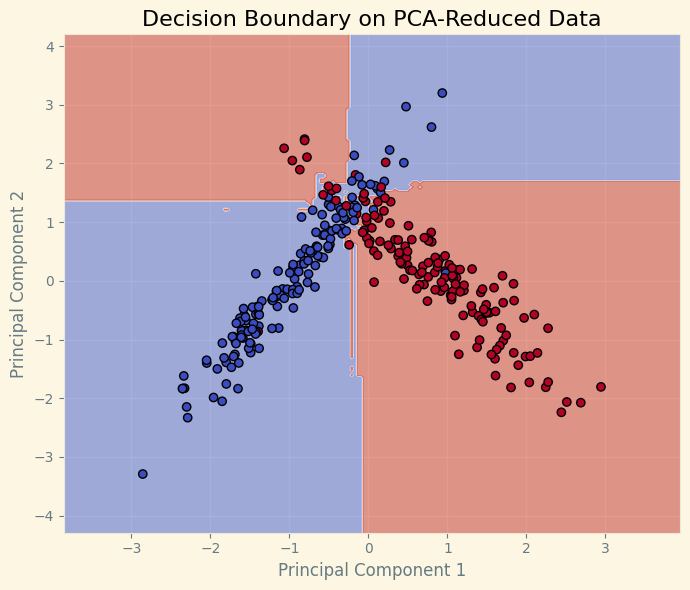

In [13]:
# -----------------------------------------------------------------------------
# 7. Visualization: Decision Boundary via PCA
#    - To illustrate model decisions, we project our features to 2D using PCA.
#    - A contour plot displays the decision boundaries on the PCA-transformed test data.
# -----------------------------------------------------------------------------
# Apply PCA to training and testing data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a new classifier on the PCA-reduced data for visualization purposes.
clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
clf_pca.fit(X_train_pca, y_train)

# Create a meshgrid to plot the decision boundaries
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig_db, ax_db = plt.subplots(figsize=(7, 6))
# Use a filled contour plot for decision boundaries
contour = ax_db.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
scatter = ax_db.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                        c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)
ax_db.set_title('Decision Boundary on PCA-Reduced Data', fontsize=16)
ax_db.set_xlabel('Principal Component 1', fontsize=12)
ax_db.set_ylabel('Principal Component 2', fontsize=12)
plt.tight_layout()
plt.show()

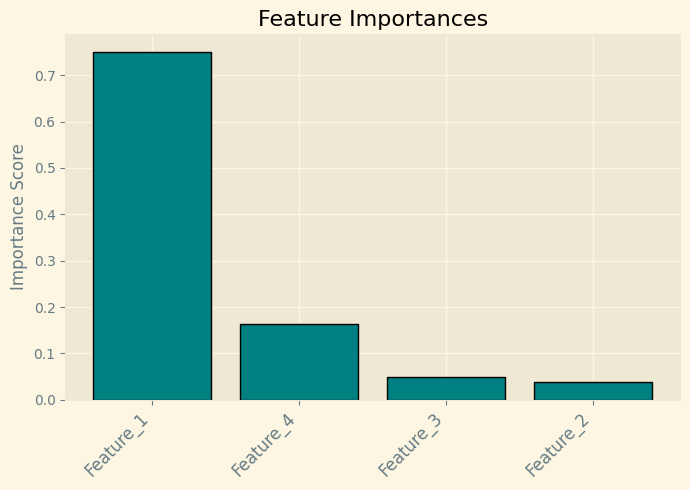

In [15]:
# -----------------------------------------------------------------------------
# 8. Visualization: Feature Importances
#    - A bar chart displaying the importance of each original feature.
#    - The style here is updated with rotated labels and a different color scheme.
# -----------------------------------------------------------------------------
importances = clf.feature_importances_
# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
features = df.columns[:-1]

fig_fi, ax_fi = plt.subplots(figsize=(7, 5))
bars = ax_fi.bar(range(len(importances)), importances[sorted_idx],
                 align='center', color='teal', edgecolor='black')
ax_fi.set_xticks(range(len(importances)))
# Rotate labels for clarity and use f-strings for neat formatting.
ax_fi.set_xticklabels([f"{features[i]}" for i in sorted_idx], rotation=45, ha='right', fontsize=12)
ax_fi.set_title('Feature Importances', fontsize=16)
ax_fi.set_ylabel('Importance Score', fontsize=12)
plt.tight_layout()
plt.show()